In [1]:
import sys
import pandas as pd
import numpy as np
sys.path.insert(0, 'C:/Udvikler/Speciale/SpecialeKode')
from utils import *
from model_evaluation.RFQModelEval import RFQModelEval, eval_utils
from DeepRFQAgent import DeepRFQAgent
from RFQAgent import DataTransformer, RFQAgent
from datatransformer import DataTransformerDeep

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

#Not to make the kernel crash
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

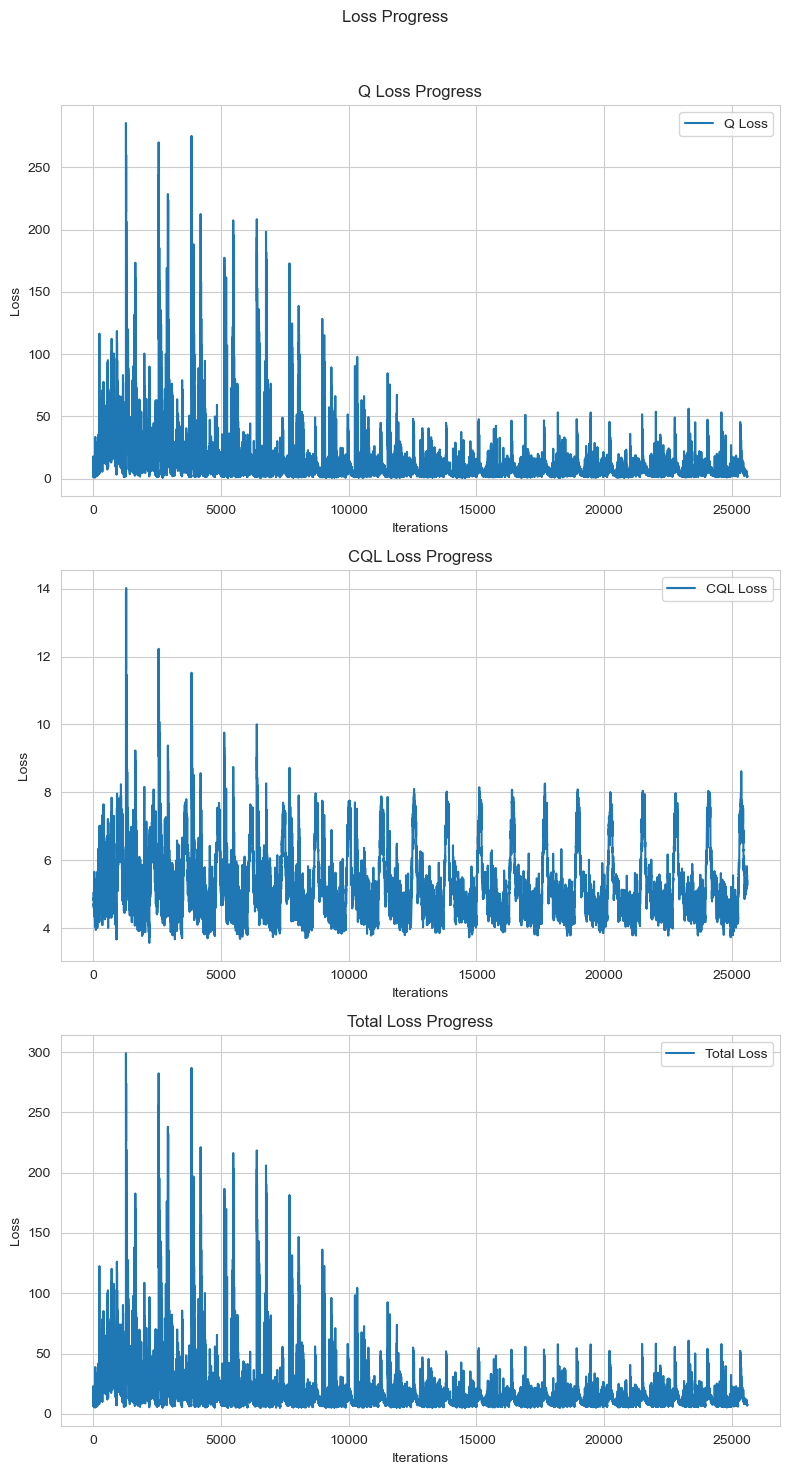

Desired HR: 23.581949232215603 

numtrades                1.505000e+03
meanDiC                  3.240532e+00
dealerHitRate            2.312000e+01
mlHitRate                1.395000e+01
MLWinShare               1.551277e+01
mlDistToCoverMean        1.670000e+00
mlDistToCoverStd         1.776439e+00
dealerDistToCoverMean    1.300000e+00
meanMLProfit             4.810000e+01
meanDealerProfit         8.110000e+01
meanMLPnLReward          8.276515e+06
meanDealerPnLReward      8.309539e+06
meanMLSharpeRatio        9.000000e-02
meanDealerSharpeRatio    1.100000e-01
meanRLReward             9.551137e-01
dealerD2TargetMean       2.230000e+00
MLD2TargetMean           4.720000e+00
MLD2TargetStd            3.641476e+00
dtype: float64


In [3]:


#######################################################

features = ["bpv_risk", "Side", "DealersInCompetition", "BookName",  "AllQMeanMid"]
#"inventoryRisk",

# Read the CSV file into a pandas DataFrame
file_path = "../data/data_inventory_risk.csv"
df = pd.read_csv(file_path)

# Datetime format
df["TradeTime"] = pd.to_datetime(df["TradeTime"], format="%m/%d/%Y %H:%M:%S")

#Split into train and test set  
train_df, test_df = split_data(df, 0.7)

#Further split test into val and test, to make model selection
#val_df, test_df = split_data(test_df.copy(), 0.5)

#Initialize datatransformer and agent 
data_transformer = DataTransformerDeep(input_features = features, lower_spread_limit=-0.005, upper_spread_limit=0.15, 
                                   reward_function=risk_PnL_reward, 
                                   opponent_actions=False, discretize_actions=True,
                                   reward_terms=True)

agent = DeepRFQAgent(data_transformer=data_transformer)
agent.train(train_df, algorithm='CQL_Segmented')

#Evaluate test data
modelEvaluator = RFQModelEval(agent)
modelPerformance = modelEvaluator.eval(test_df, algorithm='CQL_Segmented', print_post_trade=False, print_violin_plot=False)
    
print(modelPerformance)